<a href="https://colab.research.google.com/github/VarunGor/ML/blob/master/Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Classification


---

# Varun GOR

<h2> Identify the patient has diabetes or not -  Classification Problem  (Logistic Regression) </h2>
  
This dataset which was originally documented by the National Institute of Diabetes and Digestive and Kidney Diseases, consists of patients of Pima Indian Heritage, exclusively females, above 21 years of age.

**Data Fields**

		1. Pregnancies: Number of times pregnant
		2. Glucose: Plasma glucose concentration in an oral glucose tolerance test
		3. Blood Pressure: Diastolic blood pressure (mm Hg)
		4. Skin Thickness: Triceps skin fold thickness (mm)
		5. Insulin: 2-Hour serum insulin (mu U/ml)
		6. BMI: Body mass index (weight in kg/(height in m)^2)
		7. Diabetes Pedigree Function: Diabetes pedigree function, data on diabetes occurrence history in relatives and the genetic relationship of those relatives to the patient
		8. Age: Age in years
		9. Outcome: Class variable (0 or 1)


**The objective is to predict based on available data whether a patient has diabetes or not with the help of logistic regression.**

In [0]:
import pandas as pd
import numpy as np

## Loading the Data

In [0]:
url = 'https://raw.githubusercontent.com/VarunGor/Dataset/master/diabetes.csv'

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']
pds = pd.read_csv(url, header = 0, names=col_names)

In [94]:
print('Data Rows : ', len(pds))
pds.head(5)

Data Rows :  768


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
pds.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploratory Data Analysis (EDA)

In [0]:
import seaborn as sb
import matplotlib.pyplot as plt


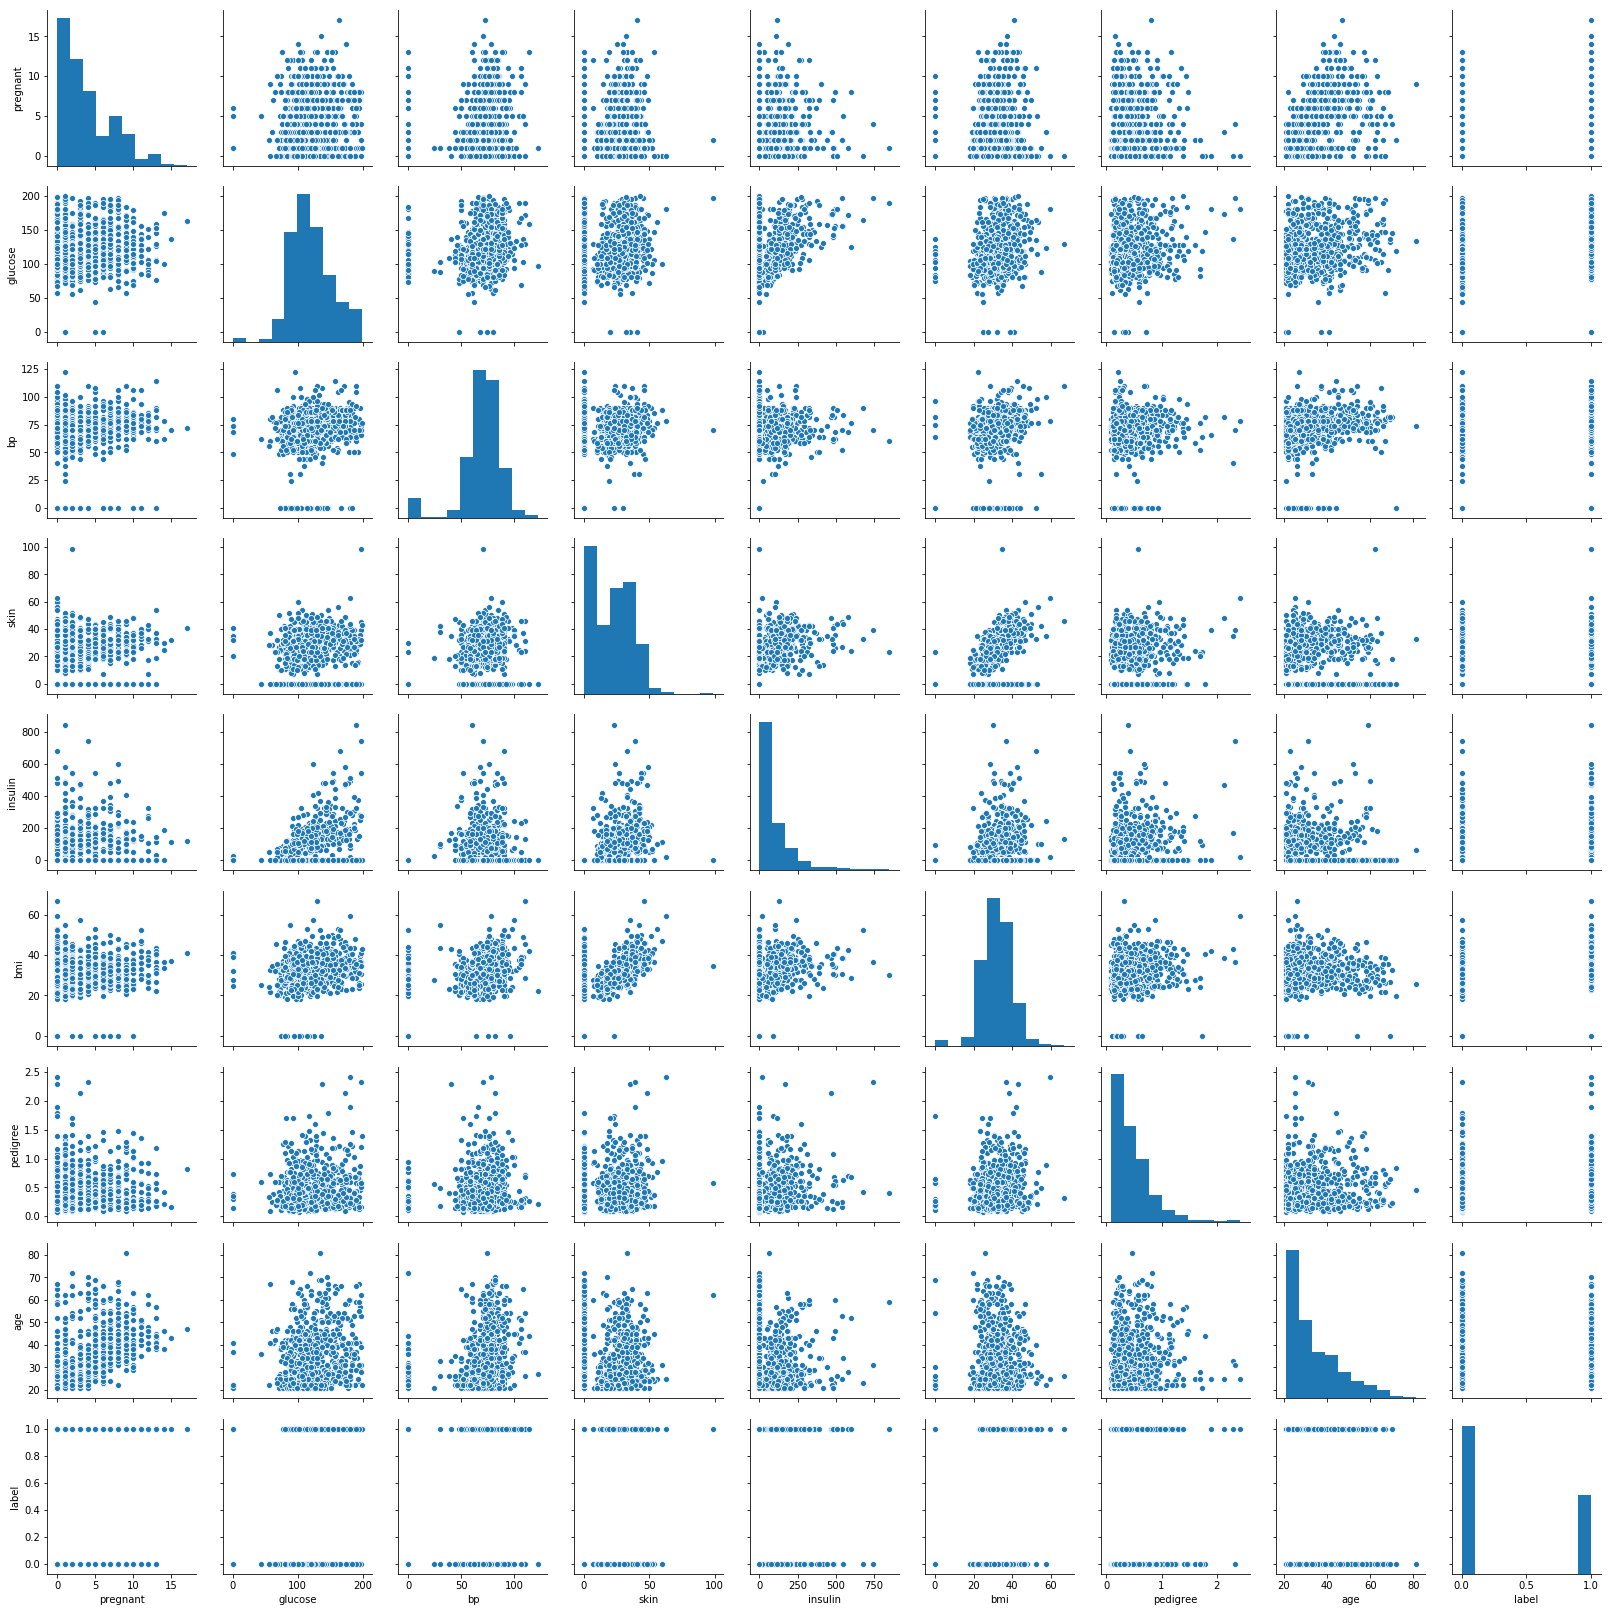

In [97]:
sb.pairplot(pds)

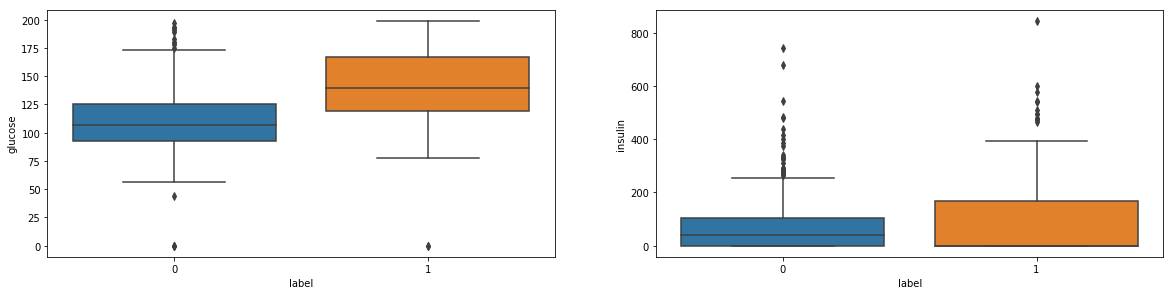

In [98]:

plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace= 0.2, wspace= 0.2)
plt.subplot(2,2,1)
sb.boxplot(x='label', y ='glucose', data=pds)
plt.subplot(2,2,2)
sb.boxplot(x='label', y ='insulin', data=pds)

In [99]:
pds.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Building a simple logistic regression model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [0]:
# create input X(Independent Variable(s)) and output y(Dependent Variable)

feature_cols = ['glucose', 'bmi', 'age', 'pregnant']
X = pds[feature_cols]

y = pds.label


In [102]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#initate and Fit model
logReg = LogisticRegression()

logReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
# make class predictions for the testing set
y_pred = logReg.predict(X_test)

# Classification accuracy: Percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred))

0.7708333333333334


## Creating benchmark with NULL Accuracy 

<b>Null accuracy</b>: Accuracy that could be achieved by always predicting the most frequent class.<br>

In [104]:
# examine the class distribution of the testing set
y_test.value_counts()

0    119
1     73
Name: label, dtype: int64

In [120]:
#calculate 0 and 1 class 
print('Class 0:', 1-y_test.mean())
print('Class 1:', y_test.mean())

print()
# calculate null accuracy 
print('Null Accuracy : ', max(y_test.mean(), 1 - y_test.mean()))

Class 0: 0.6197916666666667
Class 1: 0.3802083333333333

Null Accuracy :  0.6197916666666667


## Confusion Matrix

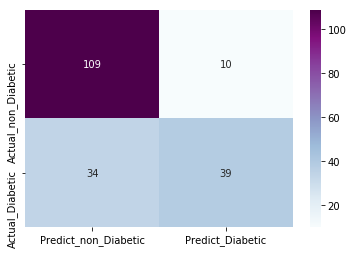

In [106]:
conf = metrics.confusion_matrix(y_test, y_pred)

sb.heatmap(conf, cmap ='BuPu', annot=True, fmt='d', xticklabels=['Predict_non_Diabetic', 'Predict_Diabetic'], yticklabels=['Actual_non_Diabetic','Actual_Diabetic'])

In [107]:
accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)


print('accuracy = ', accuracy)
print('\033[1m', 'sensitivity = ', sensitivity, '\033[0m')
print('precision =', precision)



accuracy =  0.7708333333333334
 sensitivity =  0.5342465753424658 
precision = 0.7959183673469388


**Conclusion from Confusion Matrix**

Confusion matrix gives more complete picture of how classifier is performing 
Also allows to compute various classification metrics, and these metrics can guide model selection.

**Optimize sensitivity**

## Receiver Operating Characteristic (ROC) Curves

In [0]:
# store the predicted probabilities for class 1
y_pred_prob = logReg.predict_proba(X_test)[:, 1]

# roc_curve returns 3 objects 
#   1. false positive rate, 
#   2. true positive rate, 
#   3. thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

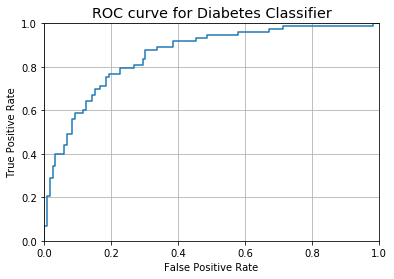

In [121]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Diabetes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

**AUC**

AUC is the percentage of the ROC plot that is underneath the curve:

In [110]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8535743064349027


## Adjusting the classification threshold

In [0]:
from sklearn.preprocessing import binarize

In [0]:
y_pred_prob_re = y_pred_prob.reshape(1,-1)

y_pred_class = binarize(y_pred_prob_re, 0.3)[0]

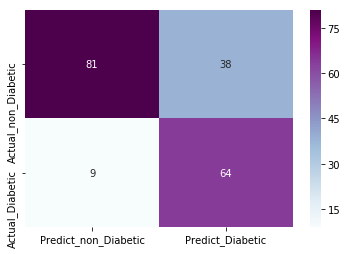

In [113]:
conf_th = metrics.confusion_matrix(y_test, y_pred_class)

sb.heatmap(conf_th, cmap ='BuPu', annot=True, fmt='d', xticklabels=['Predict_non_Diabetic', 'Predict_Diabetic'], yticklabels=['Actual_non_Diabetic','Actual_Diabetic'])

In [114]:
accuracy = metrics.accuracy_score(y_test, y_pred_class)
sensitivity = metrics.recall_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class)


print('accuracy = ', accuracy)
print('\033[1m', 'sensitivity = ', sensitivity, '\033[0m')
print('precision =', precision)



accuracy =  0.7552083333333334
 sensitivity =  0.8767123287671232 
precision = 0.6274509803921569
